<a href="https://colab.research.google.com/github/Abisola-ds/Machine-learning-with-scikit-learn/blob/master/Classification%20algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align = 'center'>Classification Algorithms</h1>

Note: This notebook is an excerpt from the Machine learning tutorial on <a href = https://pythonprogramming.net/machine-learning-tutorial-python-introduction/> programming.net</a> and the book titled: <b>Introduction to Machine learning</b> by Andreas C.Muller and Sarah Guido

<div class="alert alert-info">
Classification is a supervised learning algorithm in which the machine learn to classify new data points into a particualr based on labeled data inputs. Here, you feed some set of labeled inputs data to the machine and then the machine learns from this data and then based on this takes in a new data set for which there is no lable and give it the appropraite label
</div>

<div class="alert alert-info">
The data that we're going to be working with is the Iris Dataset.
It is one of the preloaded dataset in the Sklearn library which you can access using the import statement below:<br>
    <b>from sklearn.datasets import load_iris</b>
 
<p>Note: This is a supervised learning problem where we can predict the specie of an iris plant based on 4 attributes (the petal length, the sepal length, the sepal width, and the petal width) </p>

<p>We would use different classification algorithms and compare their accuracy</p>
</div>

In [ ]:
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import neighbors, svm
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import pandas as pd

<div class="alert alert-info">
Before we build our model, let's take a look at what our dataset looks like.
</div>

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()         #The iris data set is stored as an object similar to a dictionary with key and value pairs

In [ ]:
#We want to see the keys of the iris data set

print(iris_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


<div class="alert alert-info">
Now lets see the values that corresponds to each key</div>

In [ ]:
#displaying the first five values of the key "data"  
print(iris_data["data"][:5]) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


<div class="alert alert-info">The <b>'data' </b>key holds the petal and sepal lengths and widths which we will use as our input variable to the machine laerning project</div>

In [ ]:
#displaying the values of the key "target"  

print(iris_data["target"]) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<div class="alert alert-info">
This shows there are 150 data points and the target value has 3 unique values(0,1,and 2). We can also see that the values are ordered</div>

In [ ]:
#displaying the values of the key "target names" 
    
print(iris_data["target_names"])

['setosa' 'versicolor' 'virginica']


<div class="alert alert-info">
so, we can see the target names corresponding the the target values.<br>
    <b>This implies 0 >>>> setosa, 1>>>>>versicolor, and 2 >>>>>>>virginica</b></div>

In [ ]:
#displaying the values of the key "DESCR" 

print(iris_data["DESCR"])       

#this gives us the description of our data set

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#displaying the values of the key "feature names" 

print(iris_data["feature_names"])       

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#displaying the values of the key "filename" 

print(iris_data["filename"])      

C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv


<div class="alert alert-info">

Next thing is to split our data to training and testing data
Scikit learn has a module called <b>"train_test_split"</b> which we can use to split our data into training and testing set
</div>

In [ ]:
#So, we go ahead and import the module
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data["data"], iris_data["target"], random_state =66)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [ ]:
#Inspecting our data
import numpy as np
import pandas as pd

In [ ]:
#first, we want to convert our training dataset to a data frame
iris_dataframe = pd.DataFrame(X_train, columns = iris_data.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.7,3.0,5.0,1.7
1,5.7,2.8,4.1,1.3
2,5.1,3.7,1.5,0.4
3,6.9,3.1,4.9,1.5
4,6.5,3.0,5.8,2.2
5,5.8,2.7,3.9,1.2
6,6.3,3.3,4.7,1.6
7,5.6,2.5,3.9,1.1
8,5.8,4.0,1.2,0.2
9,6.0,3.4,4.5,1.6


<h2>KNN classifier</h2>

<div class="alert alert-info">

The first classification algorithm we would be treating is the KNN classifier which stands for the K nearest neighbors. It is called KNN because the most import paramaeter in kNN is k( which is the number of neighbours) and it is the only parameter we tune in KNN classifier</div>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
#making predictions

X_new = np.array([[7,3,2,0.5]])
prediction = knn.predict(X_new)
print(prediction)
print(iris_data["target_names"][prediction])

[0]
['setosa']


In [ ]:
#evaluating the model using the test data set

y_prediction = knn.predict(X_test)
print(y_prediction)

[1 1 1 0 1 1 0 0 0 2 2 2 0 1 2 0 1 2 2 2 0 1 1 2 1 2 0 0 1 2 0 0 2 0 1 0 1
 0]


In [ ]:
#Method 1

print(np.mean(y_prediction == y_test))

0.9210526315789473


In [ ]:
#Method 2

print(knn.score(X_test, y_test))

0.9210526315789473


In [ ]:
<div class="alert alert-info">
We can see from the score above that the KNN classifier has a 92.1% accuracy on our dataset.</div>

<h3>KNN from scratch</h3>

In [ ]:
#We use ecliudean distance to calculate knn

from math import sqrt
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import pandas as pd
import random
style.use('fivethirtyeight')
plot1 = [1,3]
plot2 = [2,5]

In [ ]:
euclidean_distance = sqrt((plot1[0]-plot2[0])**2+(plot1[1]-plot2[1])**2)
print(euclidean_distance)


#euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))

2.23606797749979


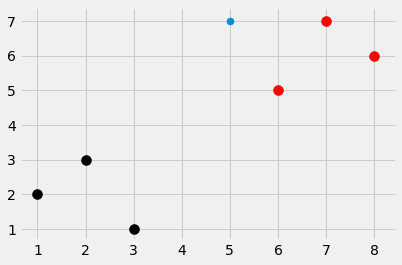

In [ ]:
dataset= {'k': [[1,2],[2,3],[3,1]], 'r': [[6,5],[7,7],[8,6]]}

new_features = [5,7]

[[plt.scatter(ii[0],ii[1],s=100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s= 50)
plt.show()

In [ ]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn("K is set to a value less than total voting groups!")
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    votes =  [ i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

result = k_nearest_neighbors(dataset, new_features, k=3)
print(result)

r


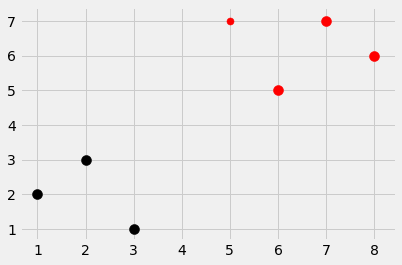

In [ ]:
[[plt.scatter(ii[0],ii[1],s=100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s= 50, color = result)
plt.show()

<h3>Decision boundary</h3>

In [ ]:
X = iris_data["data"]
y = iris_data["target"]
X, y = make_blobs(centers=2, random_state=2)

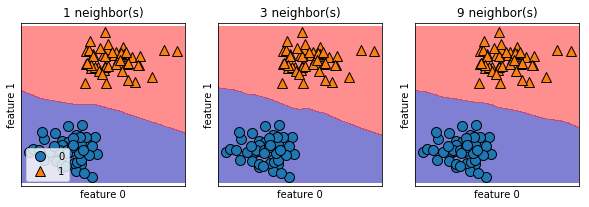

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax =ax, alpha = .5)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

<h3>Logistic regression</h3>

<div class="alert alert-info">
Logistic regression despite its name is a classification algorithm. The parameter we tune here is the 'c'. Higher value of c correspond to less regularization. It tries to ensure each data point is classified correctly. Using low value of C will cause the algorithms to try to adjust to the majority of data points. </div>

In [ ]:
#Using the default value of c which is 1

logreg = LogisticRegression().fit(X_train, y_train)
training_set_score = logreg.score(X_train, y_train)
test_set_score = logreg.score(X_test, y_test)

print(training_set_score)
print(test_set_score)

C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9732142857142857
0.9210526315789473


In [ ]:
#Using c = 100

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
training_set_score = logreg100.score(X_train, y_train)
test_set_score = logreg100.score(X_test, y_test)

print(training_set_score)
print(test_set_score)

0.9732142857142857
1.0


C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
#Using c = 0.01

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
training_set_score = logreg001.score(X_train, y_train)
test_set_score = logreg001.score(X_test, y_test)

print(training_set_score)
print(test_set_score)

0.6607142857142857
0.6842105263157895


C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
#By default, Log regression uses L2 regularization
#However, if we want a more interpretable model, we can use the L1 regulirzation
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    logreg_l1 = LogisticRegression(C=C, penalty = "l1").fit(X_train, y_train)
    training_set_score = logreg_l1.score(X_train, y_train)
    test_set_score = logreg_l1.score(X_test, y_test)

    print(C, ':' ,training_set_score)
    print(C, ':' ,test_set_score)
   

0.001 : 0.32142857142857145
0.001 : 0.3684210526315789
1 : 0.9732142857142857
1 : 0.9210526315789473
100 : 0.9732142857142857
100 : 1.0


C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\

<h3>Linear SVM</h3>

<div class="alert alert-info">

SVMs are extension of the linear SVC that allows for more complex models. </div>

Text(0.5, 0, 'Feature 1')

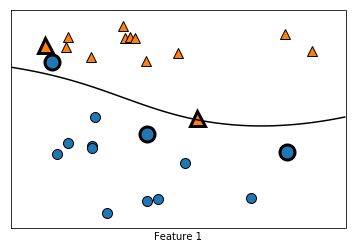

In [ ]:
from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps = .5)
mglearn.discrete_scatter(X[:, 0], X[:,1],y)

sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s =15, markeredgewidth = 3)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

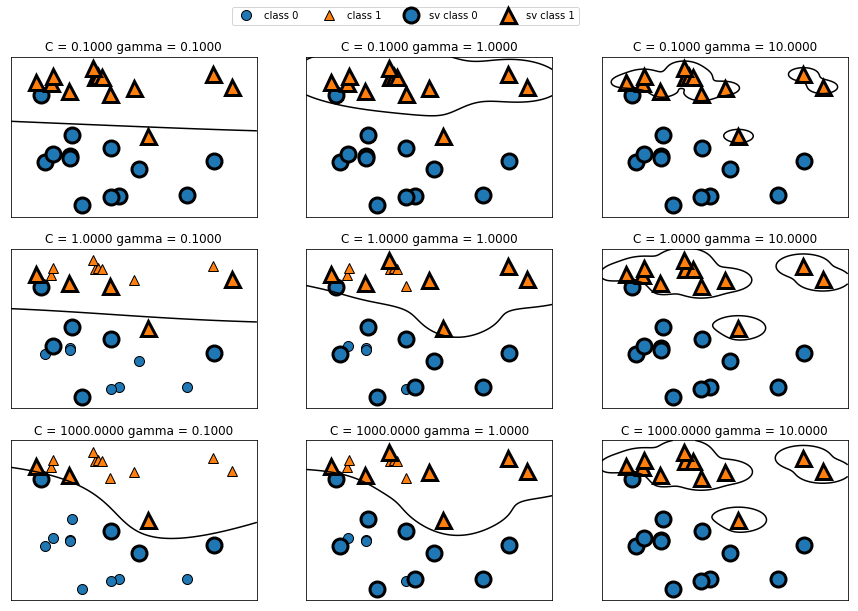

In [ ]:
fig, axes = plt.subplots(3,3, figsize = (15,10))
for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C= C, log_gamma = gamma, ax =a)
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol = 4, loc = (.9,1.2))

In [ ]:
#Applying to iris data

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state = 0)

svc = SVC()
svc.fit(X_train, y_train)



training_set_score= svc.score(X_train,y_train)
test_set_score= svc.score(X_test,y_test)
print(training_set_score)
print(test_set_score)

0.9821428571428571
0.9736842105263158


C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#rescaling features so that they are between 0 1nd 1

min_on_training = X_train.min(axis = 0)   #compute minimum value per feature on the training set
range_on_training = (X_train - min_on_training).max(axis=0)  #compute the range of each feature(max-min) on the training set


#subtract the min, and divide by range
#afterwards, min = 0 and max =1 for each feature
X_train_scaled = (X_train - min_on_training)/range_on_training

print("Minimum: {}".format(X_train_scaled.min(axis = 0)))
print("Maximum: {}".format(X_train_scaled.max(axis = 0)))

Minimum: [0. 0. 0. 0.]
Maximum: [1. 1. 1. 1.]


In [ ]:
#Do the same for the test set

X_test_scaled = (X_test - min_on_training)/range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)



training_set_score= svc.score(X_train_scaled,y_train)
test_set_score= svc.score(X_test_scaled,y_test)
print(training_set_score)
print(test_set_score)

0.9464285714285714
0.9736842105263158


C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
data_dict = {-1: np.array([[1,7], [2,8], [3,8]]), 1: np.array([[5,1], [6,-1], [7,3]])}

class Support_Vector_Machine:
    def __init__(self, visualization = True):
        self.visualization = visualization
        self.colors = {1: "r", -1: "b"}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
            
    def fit(self, data):
        self.data = data
        opt_dict = {}
        transforms = [[1,1], [-1,1], [-1,-1],[1,-1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1, self.max_feature_value * 0.01,self.max_feature_value * 0.001]
        #extremely expensive
        b_range_multiple = 5
        #WE don't  need to take as small of step
        #With b as we do with w
        b_multiple = 5
        latest_optimum = self.max_feature_value *10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            #We can do this because of convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple)
                                   , self.max_feature_value*b_range_multiple, step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        #WEakest link in the SVM fundamentality
                        #SMO attempts to fix this a bit
                        #yi(xi.w +b) >
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t, xi) +b) >= 1:
                                    found_option = False
                                    break
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                
                if w[0] < 0:
                    optimized = True
                    print("Optimized a step.")
                else:
                    w = w-step
            norms = sorted([n for n in opt_dict])
            opt_chioce = opt_dict[norms[0]]
            self.w = opt_chioce[0]
            self.b = opt_chioce[1]
            latest_optimum = opt_chioce[0][0] +step*2
    
    
    def predict(self, features):
        # sin(x.w +b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker = "*", c = self.colors[classification])
        
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0],x[1], s=100, color = self.colors[i]) for x in data_dict[i]] for i in data_dict]
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
        
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        psv1 = hyperplane( hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane( hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], "k")
        
        
                
        nsv1 = hyperplane( hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane( hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], "k")
        
                
        db1 = hyperplane( hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane( hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], "y--")
        
        plt.show()

Optimized a step.
Optimized a step.
Optimized a step.


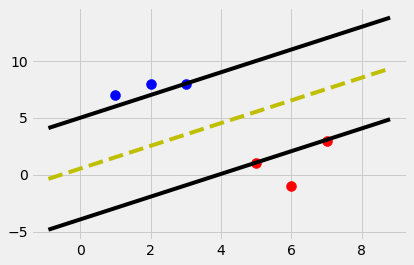

In [ ]:
svm = Support_Vector_Machine()
svm.fit(data_dict)
svm.visualize()

Optimized a step.
Optimized a step.
Optimized a step.


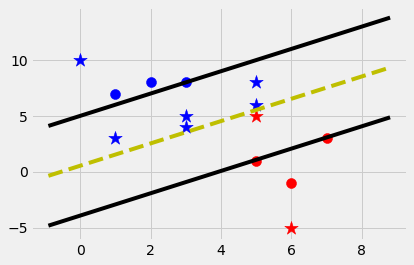

In [ ]:
svm = Support_Vector_Machine()
svm.fit(data_dict)
predict_us = [[0,10], [1,3], [3,4], [3,5], [5,5], [5,6], [6,-5], [5,8]]
for p in predict_us:
    svm.predict(p)
svm.visualize()

<h3>Logistic regression and SVC</h3>

C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Abisola Fikayomi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


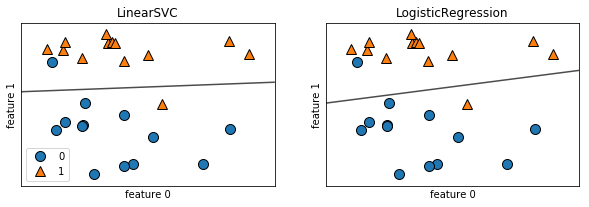

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax =ax, alpha = .7)
    mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

<h3>Decision tree</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [ ]:
training_set_score= tree.score(X_train,y_train)
test_set_score= tree.score(X_test,y_test)
print(training_set_score)
print(test_set_score)

1.0
0.9736842105263158


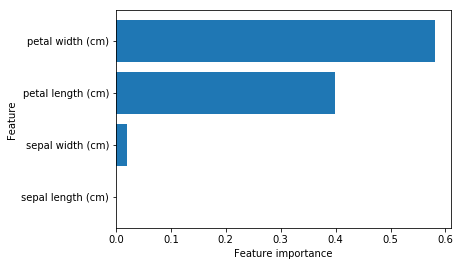

In [ ]:
#Feature importance
#This rates how important a feature is to the decision a tree makes

def plot_feature_importances_iris(model):
    n_features = iris_data.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = "center")
    plt.yticks(np.arange(n_features), iris_data.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_iris(tree)

In [ ]:
#We want to limit the depth of the tree to decrease overfiting
#This will make our model generalize to new data
tree1 = DecisionTreeClassifier( max_depth = 2, random_state = 0)
tree1.fit(X_train, y_train)
training_set_score= tree1.score(X_train,y_train)
test_set_score= tree1.score(X_test,y_test)
print(training_set_score)
print(test_set_score)

0.9642857142857143
0.8947368421052632


<h2>Ensemble decision tree</h2>

<div class="alert alert-info">
Ensemble are methods that combine multiple machine learning models to create more power models. Random forest and gradient boosted decision trees are examples of this. Decision trees tend to overfit the training data. Ensemble decision trees (Random forest) is one way to address this problem. Random forest is simply a collection of decision trees where each tree is slightly different from others</div>

<h3>Random Forest</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples = 100, noise= 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 42)

In [ ]:
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

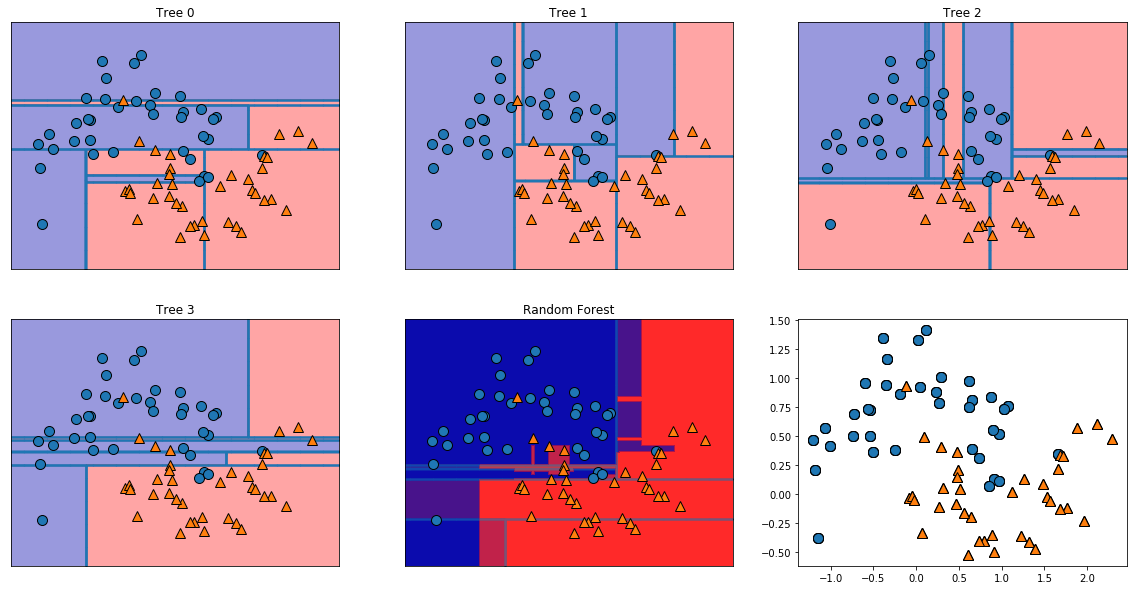

In [ ]:
fig, axes = plt.subplots(2,3, figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train, tree, ax =ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax =axes[-1,1], alpha = .4)
    axes[-1,1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)

In [ ]:
#Applying to iris data

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(X_train, y_train)



training_set_score= forest.score(X_train,y_train)
test_set_score= forest.score(X_test,y_test)
print(training_set_score)
print(test_set_score)

1.0
0.9736842105263158


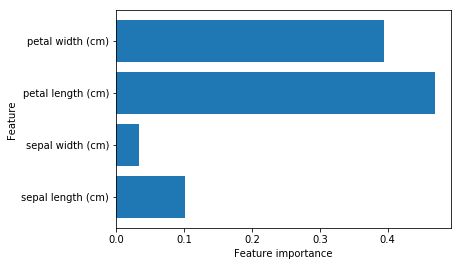

In [ ]:
plot_feature_importances_iris(forest)

<div class="alert alert-info">
Random forest feature importance are more reliable than that of a single tree. Random forest capture a more broader picture of the data than a single tree. The impotant parameters are n_estmators(larger is better), max_featues, max_depth. The good rule of thumb for setting max_features is sqrt(n_features) for classification and log2(n_features) for regression. </div>

<h3>Gradient boosted decision trees</h3>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Applying to iris data

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)



training_set_score= gbrt.score(X_train,y_train)
test_set_score= gbrt.score(X_test,y_test)
print(training_set_score)
print(test_set_score)

1.0
0.9736842105263158


In [ ]:
#Let's tune the max_depth parameter

gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)



training_set_score= gbrt.score(X_train,y_train)
test_set_score= gbrt.score(X_test,y_test)
print(training_set_score)
print(test_set_score)

1.0
0.9736842105263158


In [ ]:
#Let's tune the learning rate  parameter

gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.009)
gbrt.fit(X_train, y_train)



training_set_score= gbrt.score(X_train,y_train)
test_set_score= gbrt.score(X_test,y_test)
print(training_set_score)
print(test_set_score)

1.0
0.9736842105263158


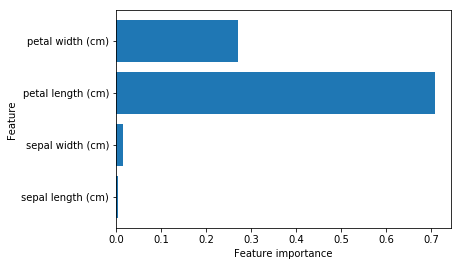

In [ ]:
plot_feature_importances_iris(gbrt)

<h3>References</h3>

<li>Machine learning tutorial on <a href = https://pythonprogramming.net/machine-learning-tutorial-python-introduction/> programming.net</a></li>

<li><b>Introduction to Machine learning</b> by Andreas C.Muller and Sarah Guido</li>